In [1]:
import cv2
from PIL import Image
import imageio
from tqdm import tqdm

import torch
import torch.nn.init
from torch.utils.data import DataLoader
from torchvision import transforms
import torchsummary

import json
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import time
import os

import util
import NeuralNets as NN
from dataset import StUnstDataset
import random

LEARNING_RATE =  0.01
EPOCHS = 128
BATCH_SIZE = 2

os.environ['CUDA_LAUNCH_BLOCKING'] = "1"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

TRAIN_PATH = "./train_data/img/"
LABEL_PATH = "./train_data/label.json"

device = 'cuda' if torch.cuda.is_available() else 'cpu'
torch.manual_seed(777)

if device == 'cuda':
    torch.cuda.manual_seed_all(777)


In [2]:

def showData(Dataset, model1=None):
    fig, ax = plt.subplots(3, 5)

    for i in range(5):
        randId = int(random.random() * len(Dataset))
        trainData = Dataset[randId]
        img = trainData[0]

        if model1== None:
            y = trainData[1]
            heatImg = util.cvt2Heatmap(y[0], img)
            heatImg = util.cvt2Heatmap(y[1], heatImg)
            
            out1 = (np.clip(y[0], 0, 1) * 255).astype(np.uint8)
            out2 = (np.clip(y[1], 0, 1) * 255).astype(np.uint8)

        else:
            model.eval()
            out = NN.run_model_img(img, model, device)
            
            heatImg = util.cvt2Heatmap(out[0], img)
            heatImg = util.cvt2Heatmap(out[1], heatImg)
            out1 = (np.clip(out[0], 0, 1) * 255).astype(np.uint8)
            out2 = (np.clip(out[1], 0, 1) * 255).astype(np.uint8)


        ax[0, i].imshow(heatImg)
        ax[1, i].imshow(out1, cmap='gray')
        ax[2, i].imshow(out2, cmap='gray')
        ax[0, i].set_title("train {}".format(i))

    plt.tight_layout()
    plt.show()

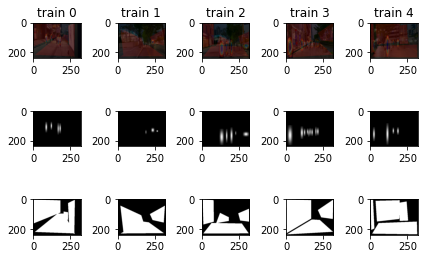

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [2, 64, 480, 640]           1,792
       BatchNorm2d-2          [2, 64, 480, 640]             128
              ReLU-3          [2, 64, 480, 640]               0
            Conv2d-4          [2, 16, 480, 640]           1,024
       BatchNorm2d-5          [2, 16, 480, 640]              32
              ReLU-6          [2, 16, 480, 640]               0
            Conv2d-7          [2, 16, 480, 640]           2,304
       BatchNorm2d-8          [2, 16, 480, 640]              32
              ReLU-9          [2, 16, 480, 640]               0
           Conv2d-10          [2, 64, 480, 640]           1,024
      BatchNorm2d-11          [2, 64, 480, 640]             128
             ReLU-12          [2, 64, 480, 640]               0
       Bottleneck-13          [2, 64, 480, 640]               0
           Conv2d-14          [2, 16, 4

C:\Users\yunmi\anaconda3\envs\torch-env\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [3]:
trainDataset = StUnstDataset(TRAIN_PATH, LABEL_PATH, limit=40)
train_loader =  DataLoader(dataset = trainDataset, batch_size=BATCH_SIZE, shuffle=True)

showData(trainDataset)

model = NN.AroundModel()
model = torch.nn.DataParallel(model)
model.to(device)

import torchsummary
torchsummary.torchsummary.summary(model, batch_size=BATCH_SIZE,device=device,input_size=(3, 480, 640))

Epoch: 1: 100%|██████████| 20/20 [00:25<00:00,  1.28s/it]


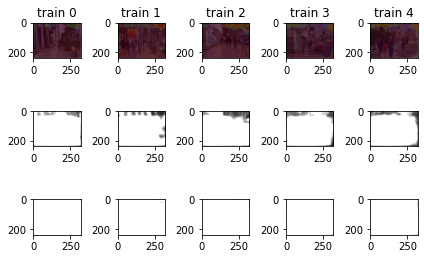

Epoch: 1 	Training Loss: 0.09929


Epoch: 2: 100%|██████████| 20/20 [00:25<00:00,  1.27s/it]


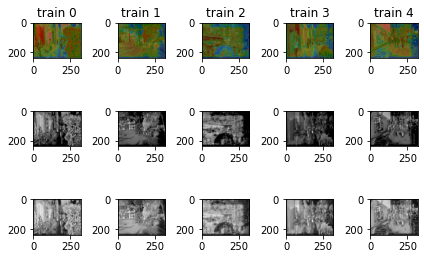

Epoch: 2 	Training Loss: 0.06734


Epoch: 3: 100%|██████████| 20/20 [00:25<00:00,  1.27s/it]


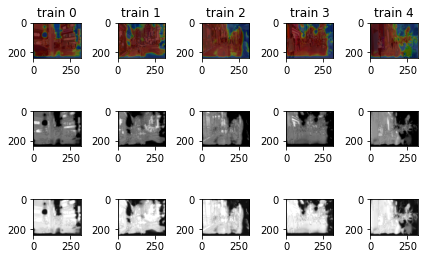

Epoch: 3 	Training Loss: 0.05859


Epoch: 4: 100%|██████████| 20/20 [00:24<00:00,  1.25s/it]


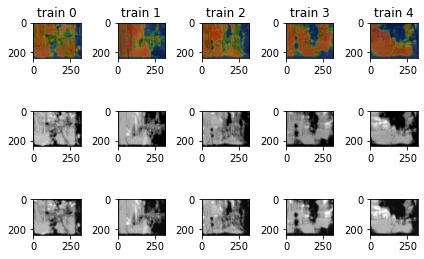

Epoch: 4 	Training Loss: 0.05251


Epoch: 5: 100%|██████████| 20/20 [00:25<00:00,  1.25s/it]


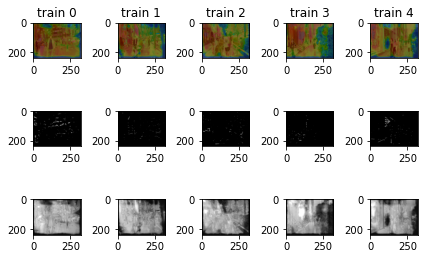

Epoch: 5 	Training Loss: 0.05280


Epoch: 6: 100%|██████████| 20/20 [00:25<00:00,  1.25s/it]


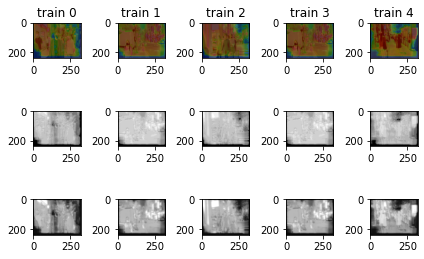

Epoch: 6 	Training Loss: 0.05014


Epoch: 7: 100%|██████████| 20/20 [00:25<00:00,  1.25s/it]


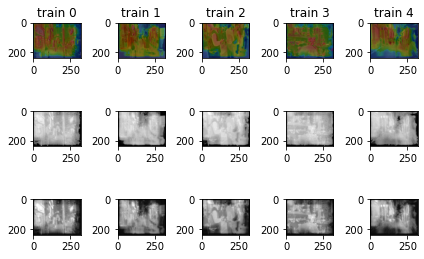

Epoch: 7 	Training Loss: 0.04977


Epoch: 8: 100%|██████████| 20/20 [00:24<00:00,  1.25s/it]


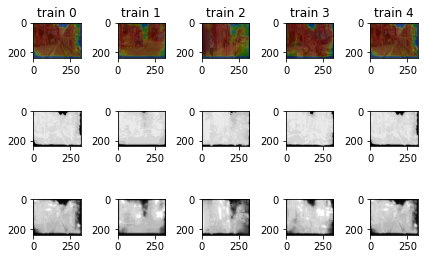

Epoch: 8 	Training Loss: 0.05098


Epoch: 9: 100%|██████████| 20/20 [00:24<00:00,  1.23s/it]


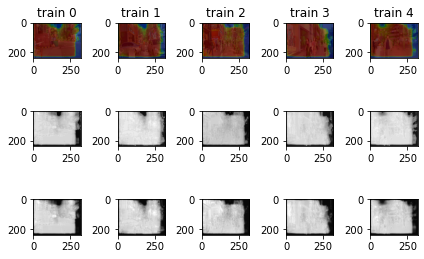

Epoch: 9 	Training Loss: 0.04891


Epoch: 10: 100%|██████████| 20/20 [00:24<00:00,  1.24s/it]


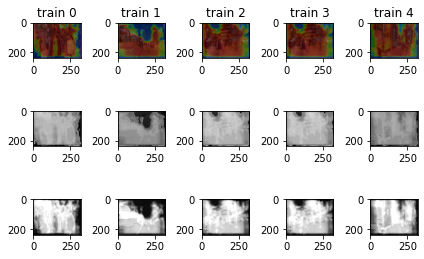

Epoch: 10 	Training Loss: 0.04703


Epoch: 11: 100%|██████████| 20/20 [00:24<00:00,  1.23s/it]


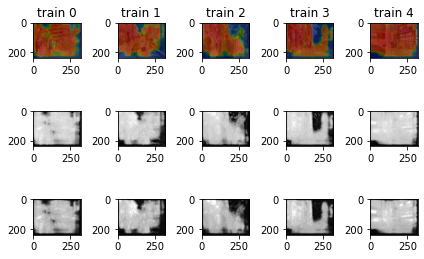

Epoch: 11 	Training Loss: 0.04978


Epoch: 12: 100%|██████████| 20/20 [00:25<00:00,  1.29s/it]


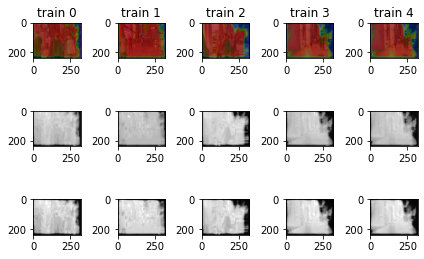

Epoch: 12 	Training Loss: 0.04636


Epoch: 13: 100%|██████████| 20/20 [00:24<00:00,  1.23s/it]


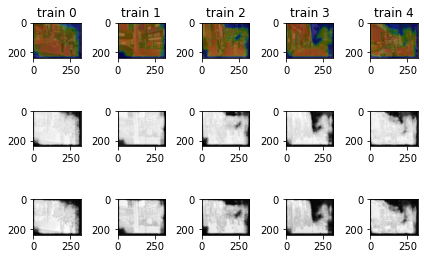

Epoch: 13 	Training Loss: 0.04631


Epoch: 14: 100%|██████████| 20/20 [00:24<00:00,  1.24s/it]


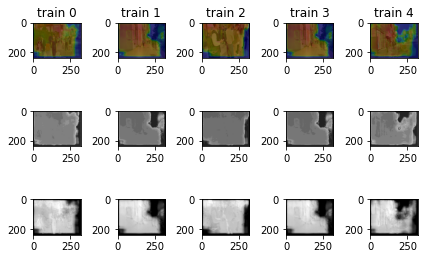

Epoch: 14 	Training Loss: 0.04614


Epoch: 15: 100%|██████████| 20/20 [00:24<00:00,  1.23s/it]


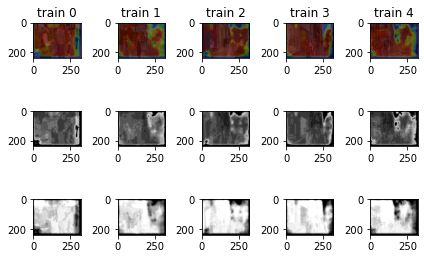

Epoch: 15 	Training Loss: 0.04513


Epoch: 16: 100%|██████████| 20/20 [00:24<00:00,  1.23s/it]


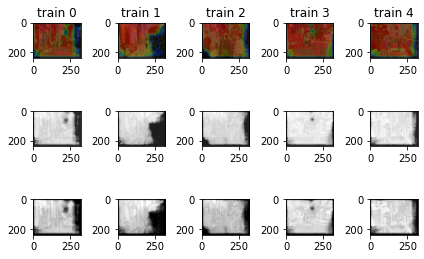

Epoch: 16 	Training Loss: 0.04309


Epoch: 17: 100%|██████████| 20/20 [00:24<00:00,  1.23s/it]


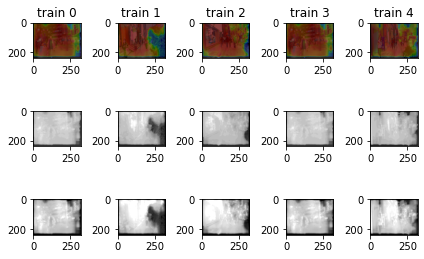

Epoch: 17 	Training Loss: 0.04550


Epoch: 18: 100%|██████████| 20/20 [00:24<00:00,  1.23s/it]


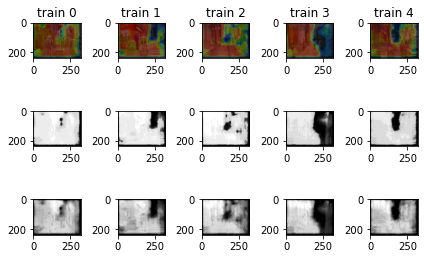

Epoch: 18 	Training Loss: 0.04410


Epoch: 19: 100%|██████████| 20/20 [00:24<00:00,  1.23s/it]


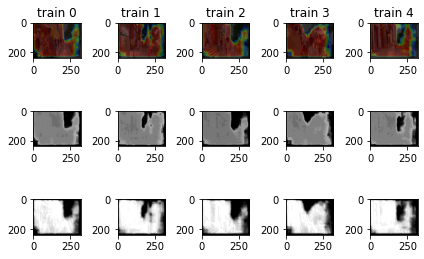

Epoch: 19 	Training Loss: 0.04168


Epoch: 20: 100%|██████████| 20/20 [00:25<00:00,  1.26s/it]


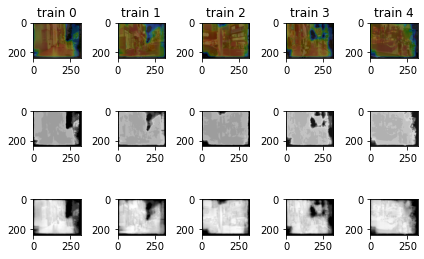

Epoch: 20 	Training Loss: 0.04412


Epoch: 21: 100%|██████████| 20/20 [00:24<00:00,  1.25s/it]


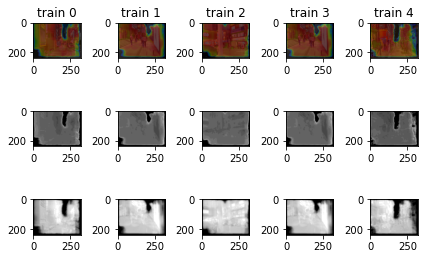

Epoch: 21 	Training Loss: 0.04278


Epoch: 22: 100%|██████████| 20/20 [00:24<00:00,  1.24s/it]


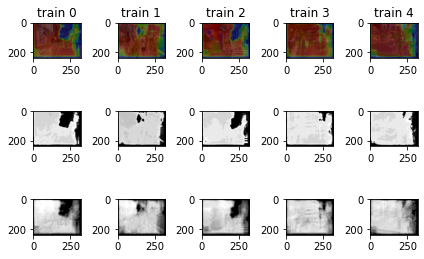

Epoch: 22 	Training Loss: 0.04341


Epoch: 23: 100%|██████████| 20/20 [00:24<00:00,  1.23s/it]


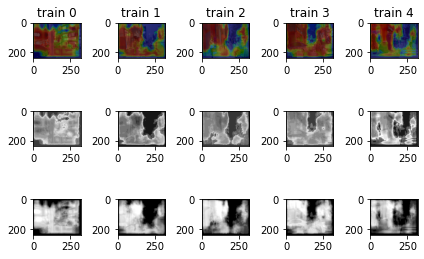

Epoch: 23 	Training Loss: 0.04302


Epoch: 24: 100%|██████████| 20/20 [00:24<00:00,  1.23s/it]


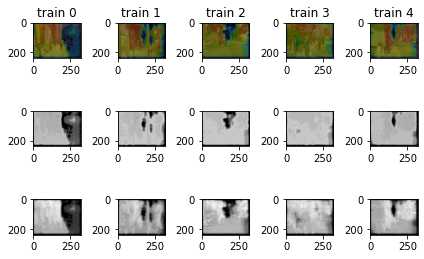

Epoch: 24 	Training Loss: 0.04101


Epoch: 25: 100%|██████████| 20/20 [00:24<00:00,  1.23s/it]


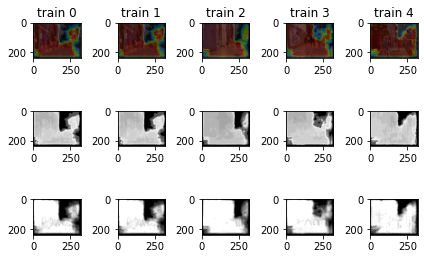

Epoch: 25 	Training Loss: 0.04346


Epoch: 26: 100%|██████████| 20/20 [00:24<00:00,  1.23s/it]


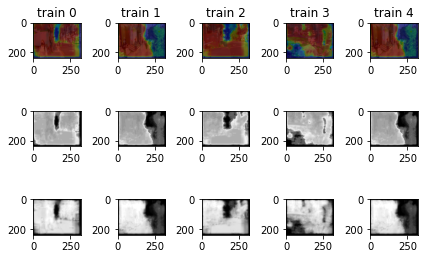

Epoch: 26 	Training Loss: 0.03959


Epoch: 27: 100%|██████████| 20/20 [00:24<00:00,  1.23s/it]


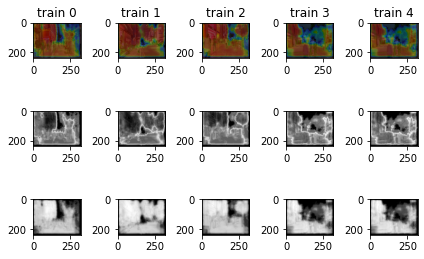

Epoch: 27 	Training Loss: 0.04062


Epoch: 28: 100%|██████████| 20/20 [00:24<00:00,  1.23s/it]


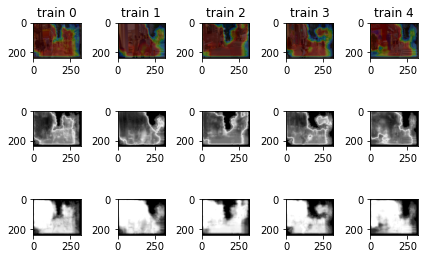

Epoch: 28 	Training Loss: 0.04029


Epoch: 29: 100%|██████████| 20/20 [00:24<00:00,  1.23s/it]


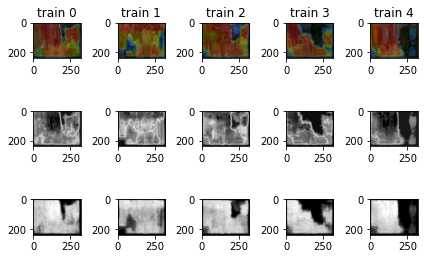

Epoch: 29 	Training Loss: 0.03935


Epoch: 30: 100%|██████████| 20/20 [00:24<00:00,  1.23s/it]


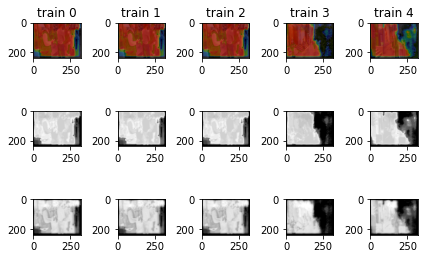

Epoch: 30 	Training Loss: 0.03927


Epoch: 31: 100%|██████████| 20/20 [00:24<00:00,  1.24s/it]


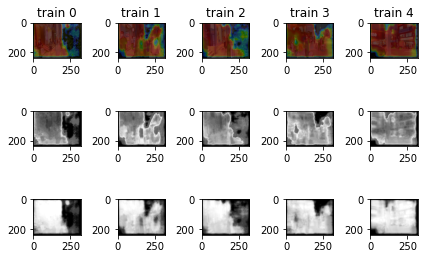

Epoch: 31 	Training Loss: 0.03889


Epoch: 32: 100%|██████████| 20/20 [00:24<00:00,  1.23s/it]


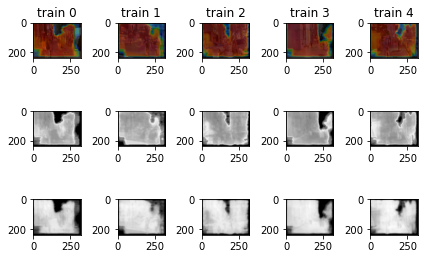

Epoch: 32 	Training Loss: 0.03853


Epoch: 33: 100%|██████████| 20/20 [00:24<00:00,  1.23s/it]


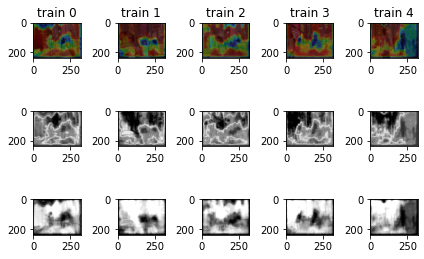

Epoch: 33 	Training Loss: 0.03869


Epoch: 34: 100%|██████████| 20/20 [00:24<00:00,  1.23s/it]


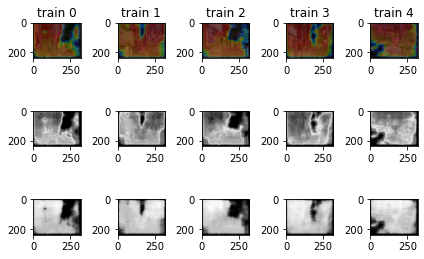

Epoch: 34 	Training Loss: 0.03904


Epoch: 35: 100%|██████████| 20/20 [00:24<00:00,  1.24s/it]


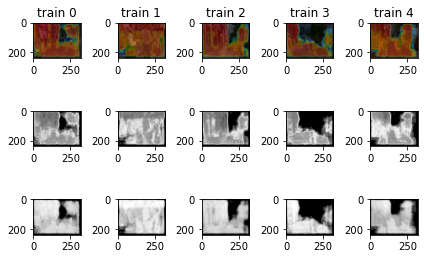

Epoch: 35 	Training Loss: 0.03836


Epoch: 36: 100%|██████████| 20/20 [00:24<00:00,  1.25s/it]


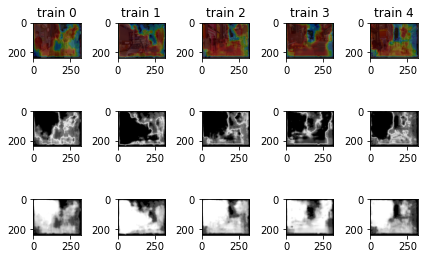

Epoch: 36 	Training Loss: 0.03870


Epoch: 37: 100%|██████████| 20/20 [00:24<00:00,  1.23s/it]


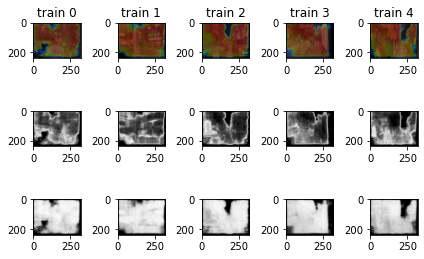

Epoch: 37 	Training Loss: 0.03866


Epoch: 38: 100%|██████████| 20/20 [00:26<00:00,  1.31s/it]


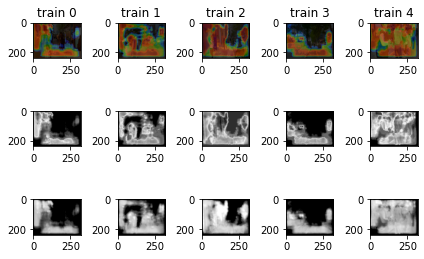

Epoch: 38 	Training Loss: 0.03763


Epoch: 39: 100%|██████████| 20/20 [00:24<00:00,  1.23s/it]


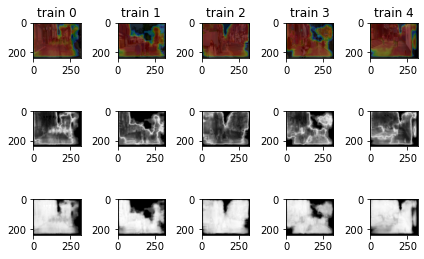

Epoch: 39 	Training Loss: 0.03849


Epoch: 40: 100%|██████████| 20/20 [00:24<00:00,  1.23s/it]


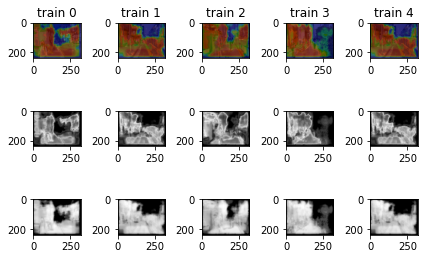

Epoch: 40 	Training Loss: 0.03692


Epoch: 41: 100%|██████████| 20/20 [00:24<00:00,  1.24s/it]


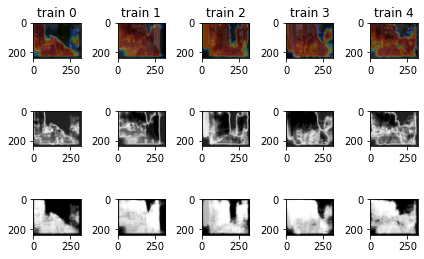

Epoch: 41 	Training Loss: 0.03631


Epoch: 42: 100%|██████████| 20/20 [00:25<00:00,  1.25s/it]


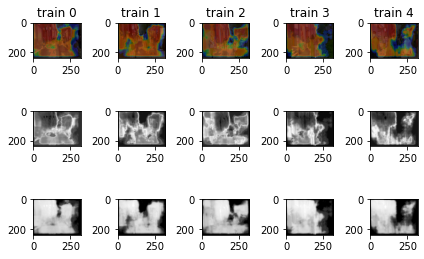

Epoch: 42 	Training Loss: 0.03533


Epoch: 43: 100%|██████████| 20/20 [00:25<00:00,  1.30s/it]


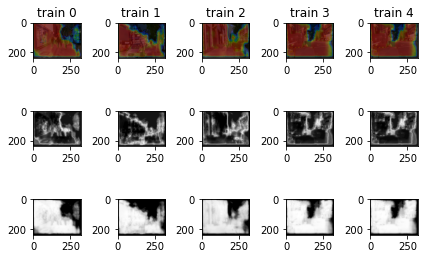

Epoch: 43 	Training Loss: 0.03627


Epoch: 44: 100%|██████████| 20/20 [00:25<00:00,  1.25s/it]


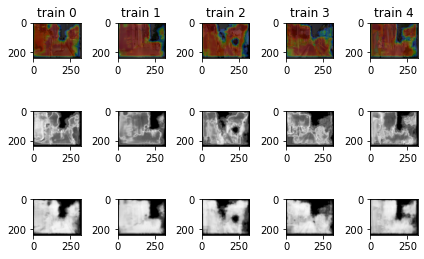

Epoch: 44 	Training Loss: 0.03511


Epoch: 45: 100%|██████████| 20/20 [00:24<00:00,  1.25s/it]


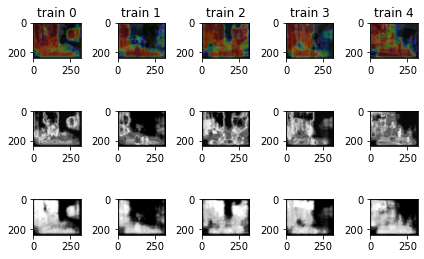

Epoch: 45 	Training Loss: 0.03447


Epoch: 46: 100%|██████████| 20/20 [00:24<00:00,  1.25s/it]


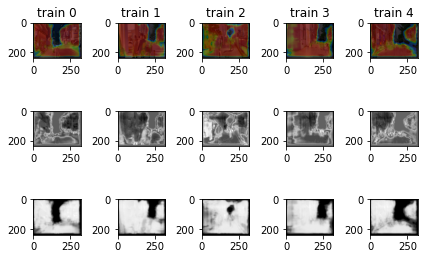

Epoch: 46 	Training Loss: 0.03511


Epoch: 47: 100%|██████████| 20/20 [00:24<00:00,  1.25s/it]


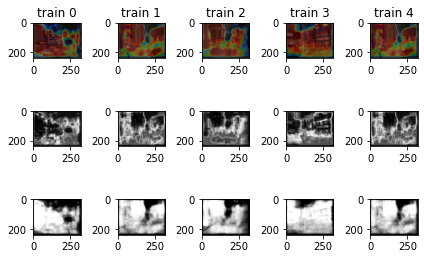

Epoch: 47 	Training Loss: 0.03398


Epoch: 48: 100%|██████████| 20/20 [00:24<00:00,  1.23s/it]


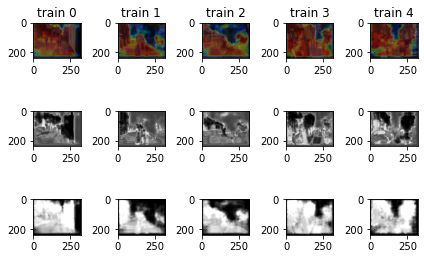

Epoch: 48 	Training Loss: 0.03536


Epoch: 49: 100%|██████████| 20/20 [00:24<00:00,  1.23s/it]


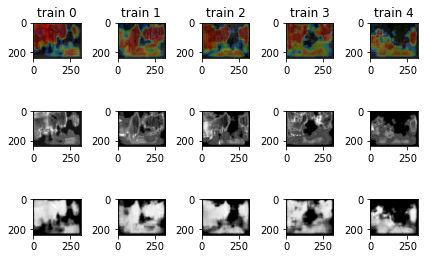

Epoch: 49 	Training Loss: 0.03451


Epoch: 50: 100%|██████████| 20/20 [00:24<00:00,  1.23s/it]


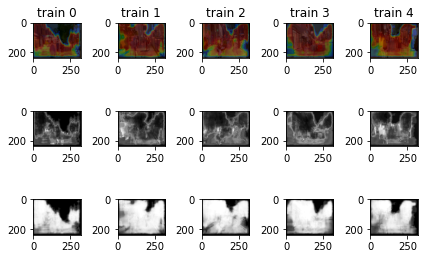

Epoch: 50 	Training Loss: 0.03382


Epoch: 51: 100%|██████████| 20/20 [00:24<00:00,  1.23s/it]


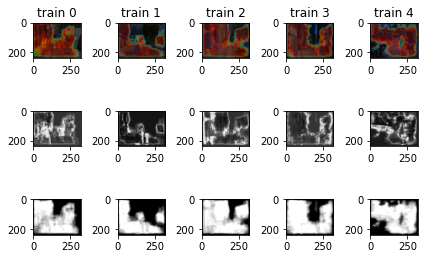

Epoch: 51 	Training Loss: 0.03452


Epoch: 52: 100%|██████████| 20/20 [00:24<00:00,  1.23s/it]


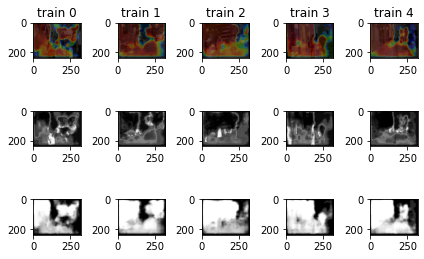

Epoch: 52 	Training Loss: 0.03433


Epoch: 53: 100%|██████████| 20/20 [00:24<00:00,  1.23s/it]


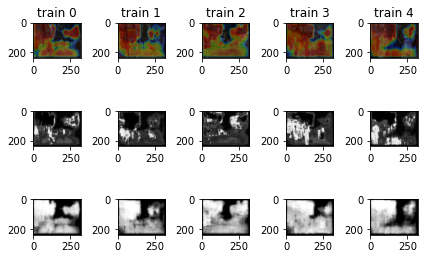

Epoch: 53 	Training Loss: 0.03401


Epoch: 54: 100%|██████████| 20/20 [00:24<00:00,  1.23s/it]


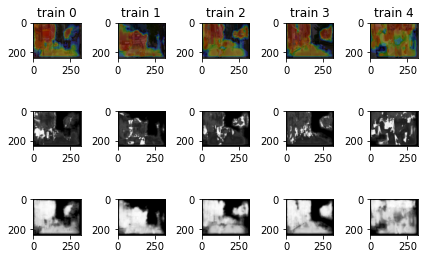

Epoch: 54 	Training Loss: 0.03257


Epoch: 55: 100%|██████████| 20/20 [00:24<00:00,  1.23s/it]


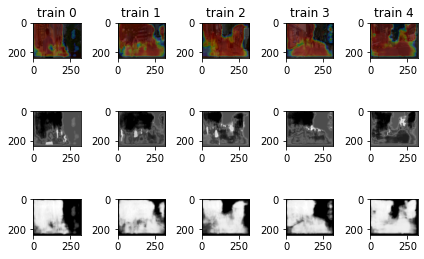

Epoch: 55 	Training Loss: 0.03289


Epoch: 56: 100%|██████████| 20/20 [00:24<00:00,  1.23s/it]


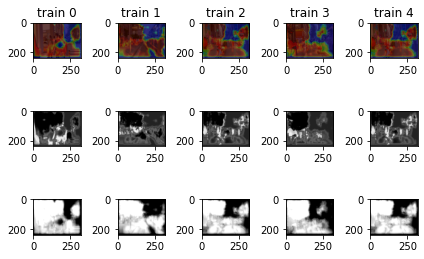

Epoch: 56 	Training Loss: 0.03328


Epoch: 57: 100%|██████████| 20/20 [00:24<00:00,  1.23s/it]


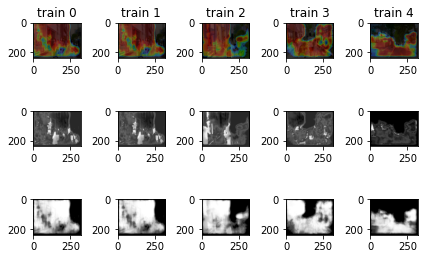

Epoch: 57 	Training Loss: 0.03107


Epoch: 58: 100%|██████████| 20/20 [00:24<00:00,  1.24s/it]


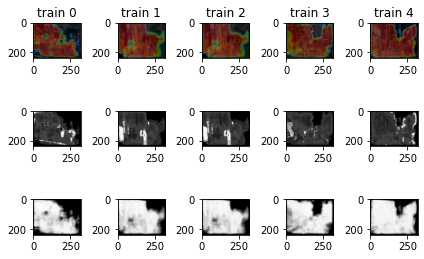

Epoch: 58 	Training Loss: 0.03138


Epoch: 59: 100%|██████████| 20/20 [00:24<00:00,  1.23s/it]


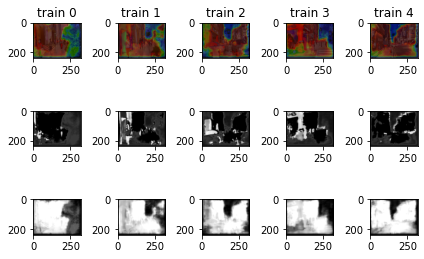

Epoch: 59 	Training Loss: 0.03118


Epoch: 60: 100%|██████████| 20/20 [00:24<00:00,  1.23s/it]


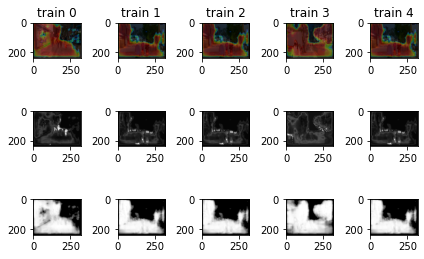

Epoch: 60 	Training Loss: 0.03312


Epoch: 61: 100%|██████████| 20/20 [00:24<00:00,  1.24s/it]


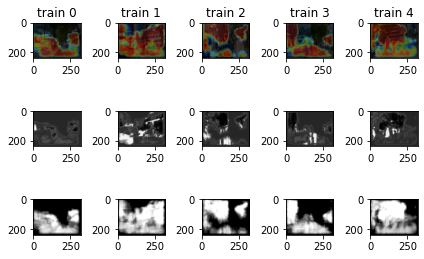

Epoch: 61 	Training Loss: 0.03008


Epoch: 62: 100%|██████████| 20/20 [00:24<00:00,  1.24s/it]


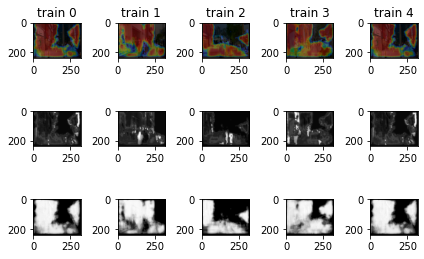

Epoch: 62 	Training Loss: 0.03123


Epoch: 63: 100%|██████████| 20/20 [00:24<00:00,  1.24s/it]


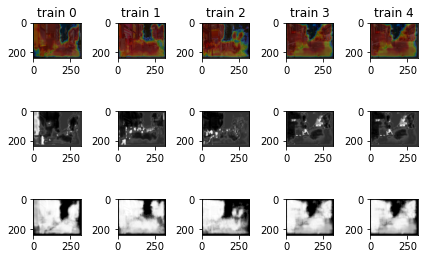

Epoch: 63 	Training Loss: 0.02925


Epoch: 64: 100%|██████████| 20/20 [00:24<00:00,  1.25s/it]


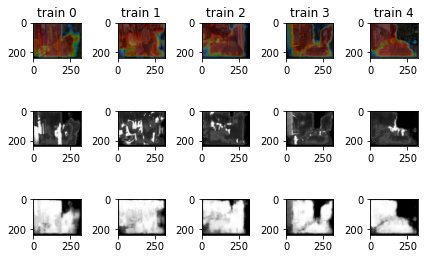

Epoch: 64 	Training Loss: 0.03068


Epoch: 65: 100%|██████████| 20/20 [00:25<00:00,  1.25s/it]


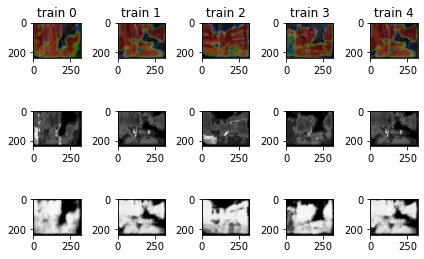

Epoch: 65 	Training Loss: 0.02924


Epoch: 66: 100%|██████████| 20/20 [00:24<00:00,  1.23s/it]


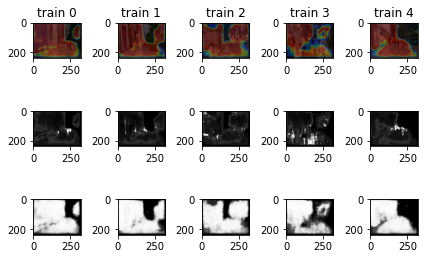

Epoch: 66 	Training Loss: 0.02778


Epoch: 67: 100%|██████████| 20/20 [00:24<00:00,  1.25s/it]


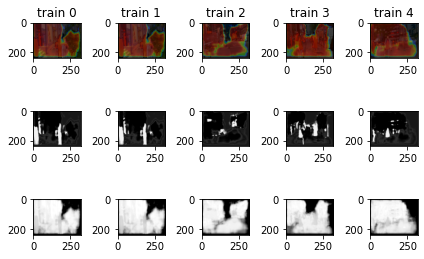

Epoch: 67 	Training Loss: 0.02864


Epoch: 68: 100%|██████████| 20/20 [00:24<00:00,  1.23s/it]


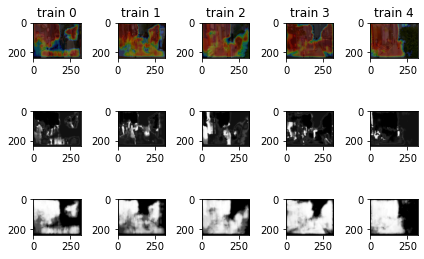

Epoch: 68 	Training Loss: 0.02790


Epoch: 69: 100%|██████████| 20/20 [00:24<00:00,  1.23s/it]


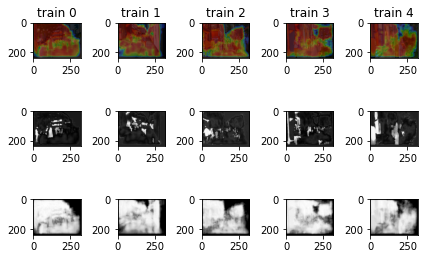

Epoch: 69 	Training Loss: 0.02774


Epoch: 70: 100%|██████████| 20/20 [00:24<00:00,  1.23s/it]


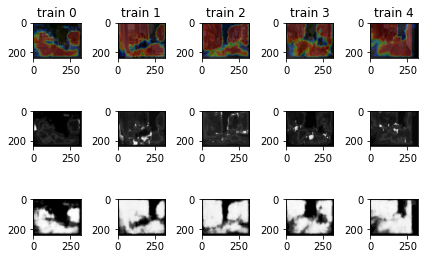

Epoch: 70 	Training Loss: 0.02770


Epoch: 71: 100%|██████████| 20/20 [00:24<00:00,  1.23s/it]


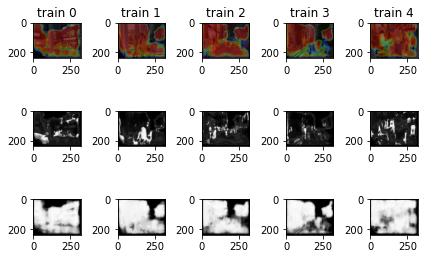

Epoch: 71 	Training Loss: 0.02767


Epoch: 72: 100%|██████████| 20/20 [00:24<00:00,  1.23s/it]


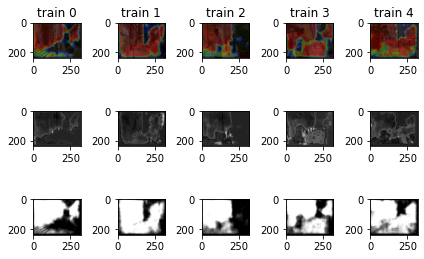

Epoch: 72 	Training Loss: 0.02840


Epoch: 73: 100%|██████████| 20/20 [00:24<00:00,  1.23s/it]


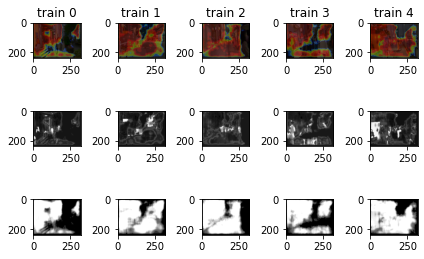

Epoch: 73 	Training Loss: 0.02882


Epoch: 74: 100%|██████████| 20/20 [00:24<00:00,  1.23s/it]


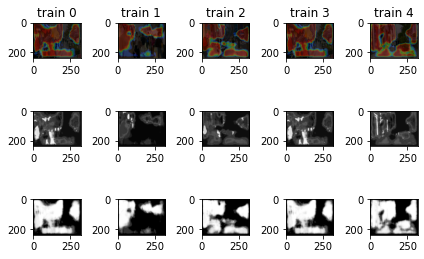

Epoch: 74 	Training Loss: 0.02624


Epoch: 75: 100%|██████████| 20/20 [00:24<00:00,  1.23s/it]


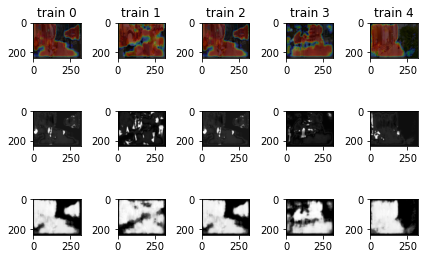

Epoch: 75 	Training Loss: 0.02526


Epoch: 76: 100%|██████████| 20/20 [00:24<00:00,  1.23s/it]


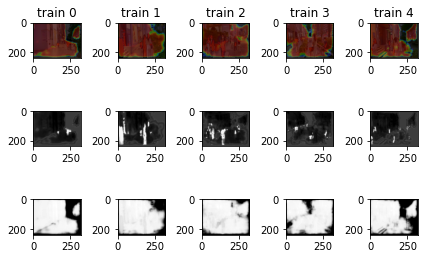

Epoch: 76 	Training Loss: 0.02614


Epoch: 77: 100%|██████████| 20/20 [00:25<00:00,  1.27s/it]


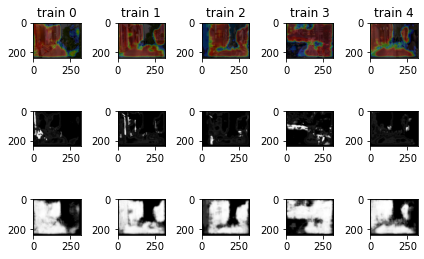

Epoch: 77 	Training Loss: 0.02437


Epoch: 78: 100%|██████████| 20/20 [00:24<00:00,  1.24s/it]


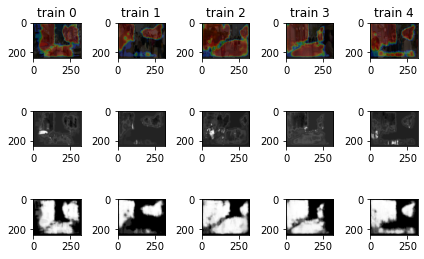

Epoch: 78 	Training Loss: 0.02416


Epoch: 79: 100%|██████████| 20/20 [00:24<00:00,  1.23s/it]


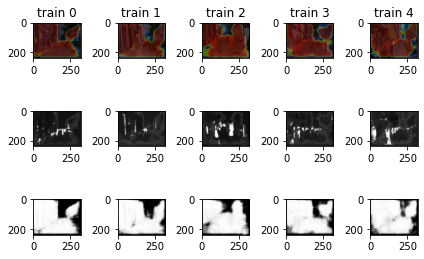

Epoch: 79 	Training Loss: 0.02413


Epoch: 80: 100%|██████████| 20/20 [00:24<00:00,  1.23s/it]


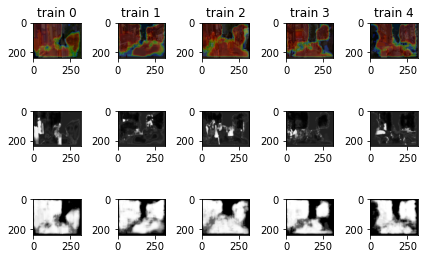

Epoch: 80 	Training Loss: 0.02570


Epoch: 81: 100%|██████████| 20/20 [00:24<00:00,  1.23s/it]


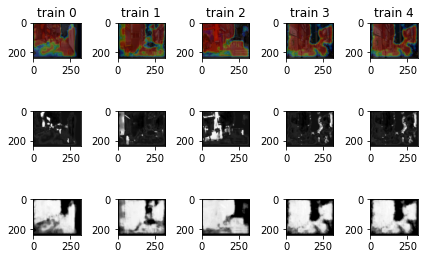

Epoch: 81 	Training Loss: 0.02639


Epoch: 82: 100%|██████████| 20/20 [00:24<00:00,  1.23s/it]


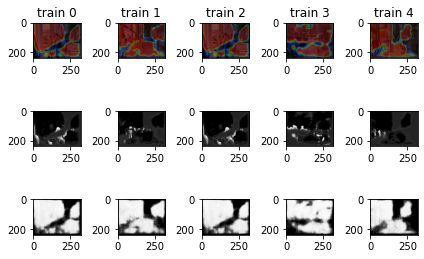

Epoch: 82 	Training Loss: 0.02260


Epoch: 83: 100%|██████████| 20/20 [00:24<00:00,  1.23s/it]


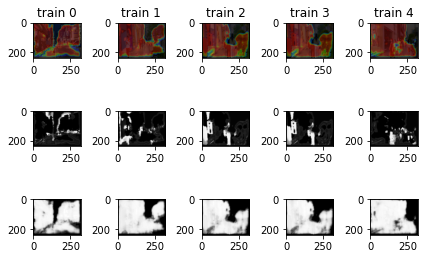

Epoch: 83 	Training Loss: 0.02356


Epoch: 84: 100%|██████████| 20/20 [00:24<00:00,  1.23s/it]


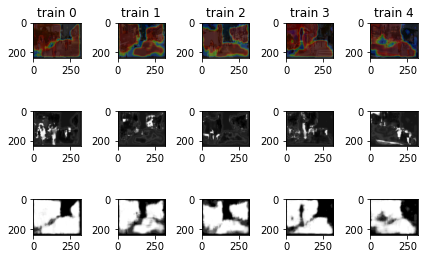

Epoch: 84 	Training Loss: 0.02244


Epoch: 85: 100%|██████████| 20/20 [00:24<00:00,  1.23s/it]


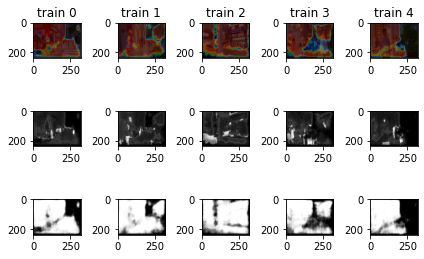

Epoch: 85 	Training Loss: 0.02154


Epoch: 86: 100%|██████████| 20/20 [00:24<00:00,  1.23s/it]


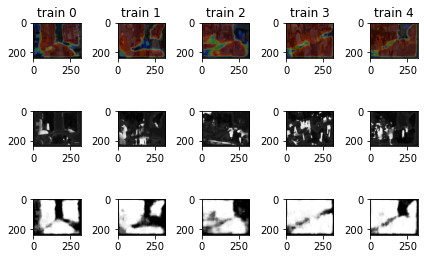

Epoch: 86 	Training Loss: 0.02153


Epoch: 87: 100%|██████████| 20/20 [00:24<00:00,  1.25s/it]


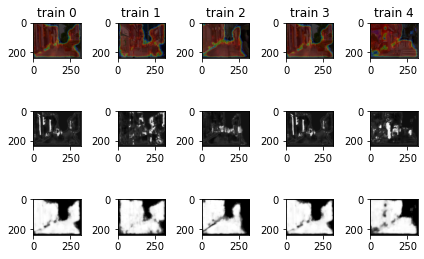

Epoch: 87 	Training Loss: 0.02120


Epoch: 88: 100%|██████████| 20/20 [00:25<00:00,  1.27s/it]


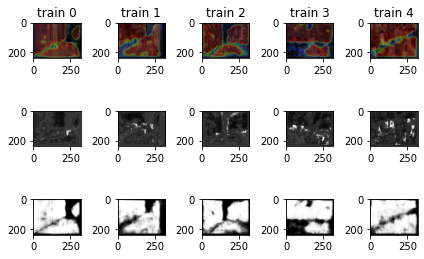

Epoch: 88 	Training Loss: 0.02032


Epoch: 89: 100%|██████████| 20/20 [00:25<00:00,  1.27s/it]


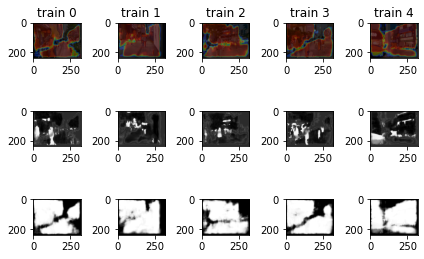

Epoch: 89 	Training Loss: 0.01996


Epoch: 90: 100%|██████████| 20/20 [00:24<00:00,  1.24s/it]


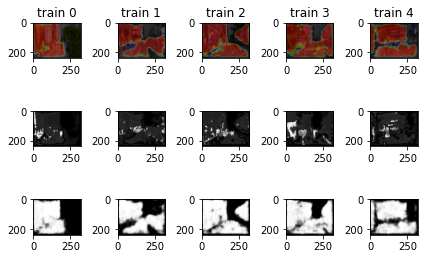

Epoch: 90 	Training Loss: 0.02057


Epoch: 91: 100%|██████████| 20/20 [00:24<00:00,  1.23s/it]


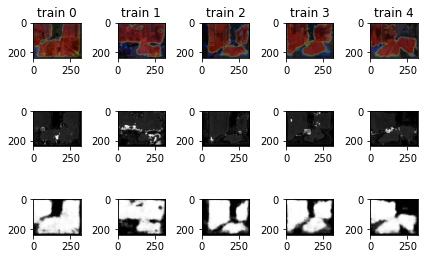

Epoch: 91 	Training Loss: 0.02075


Epoch: 92: 100%|██████████| 20/20 [00:24<00:00,  1.23s/it]


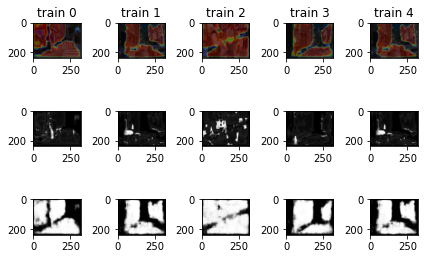

Epoch: 92 	Training Loss: 0.01925


Epoch: 93: 100%|██████████| 20/20 [00:24<00:00,  1.23s/it]


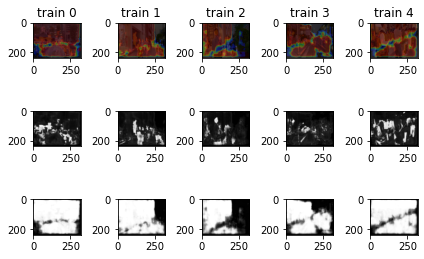

Epoch: 93 	Training Loss: 0.02086


Epoch: 94: 100%|██████████| 20/20 [00:24<00:00,  1.23s/it]


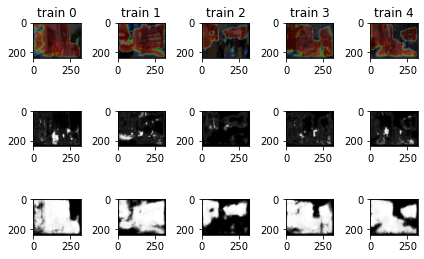

Epoch: 94 	Training Loss: 0.02038


Epoch: 95: 100%|██████████| 20/20 [00:24<00:00,  1.24s/it]


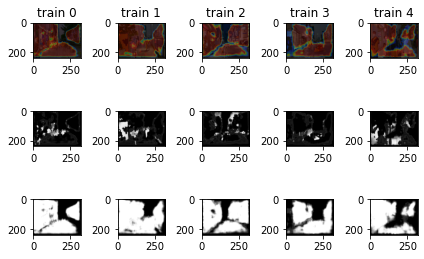

Epoch: 95 	Training Loss: 0.02095


Epoch: 96: 100%|██████████| 20/20 [00:24<00:00,  1.23s/it]


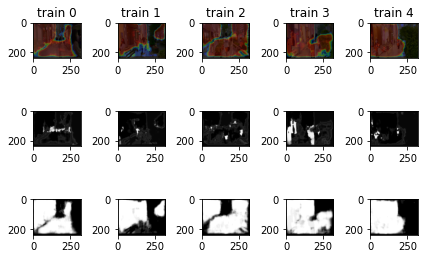

Epoch: 96 	Training Loss: 0.02208


Epoch: 97: 100%|██████████| 20/20 [00:24<00:00,  1.24s/it]


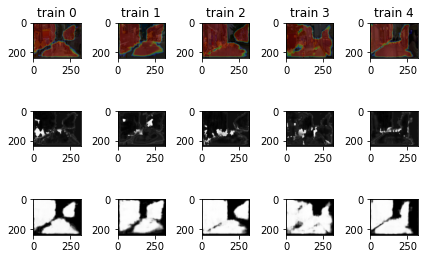

Epoch: 97 	Training Loss: 0.01940


Epoch: 98: 100%|██████████| 20/20 [00:24<00:00,  1.23s/it]


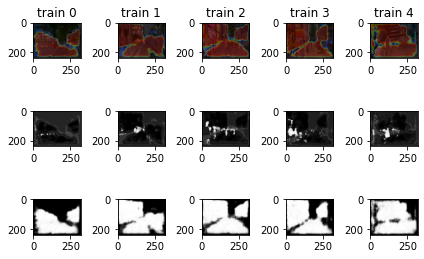

Epoch: 98 	Training Loss: 0.01864


Epoch: 99: 100%|██████████| 20/20 [00:24<00:00,  1.23s/it]


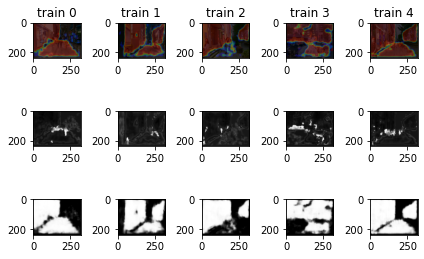

Epoch: 99 	Training Loss: 0.01765


Epoch: 100: 100%|██████████| 20/20 [00:24<00:00,  1.23s/it]


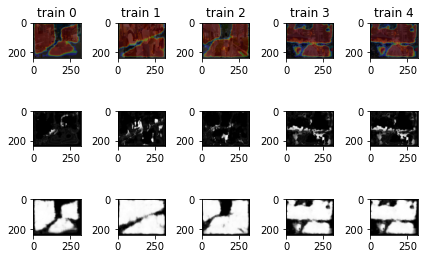

Epoch: 100 	Training Loss: 0.01724


Epoch: 101: 100%|██████████| 20/20 [00:24<00:00,  1.23s/it]


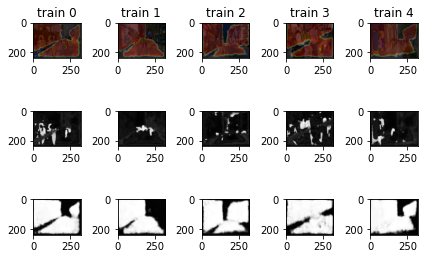

Epoch: 101 	Training Loss: 0.01693


Epoch: 102: 100%|██████████| 20/20 [00:24<00:00,  1.23s/it]


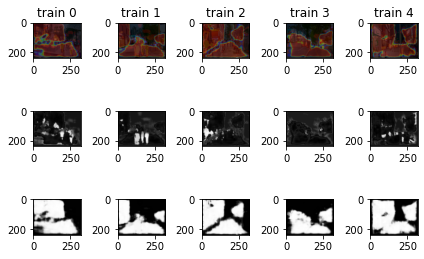

Epoch: 102 	Training Loss: 0.01576


Epoch: 103: 100%|██████████| 20/20 [00:24<00:00,  1.23s/it]


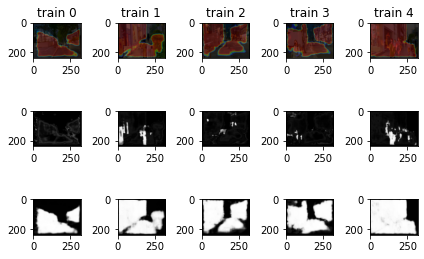

Epoch: 103 	Training Loss: 0.01534


Epoch: 104: 100%|██████████| 20/20 [00:24<00:00,  1.23s/it]


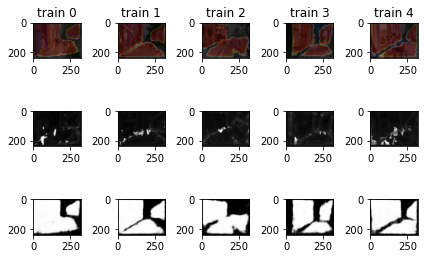

Epoch: 104 	Training Loss: 0.01566


Epoch: 105: 100%|██████████| 20/20 [00:24<00:00,  1.24s/it]


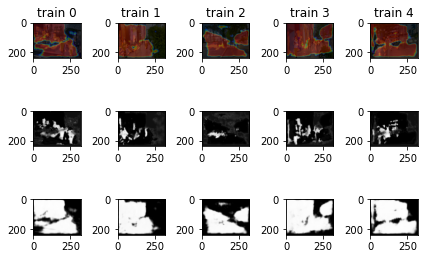

Epoch: 105 	Training Loss: 0.01677


Epoch: 106: 100%|██████████| 20/20 [00:24<00:00,  1.23s/it]


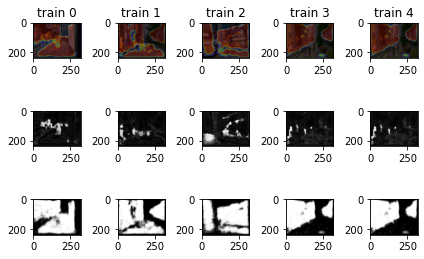

Epoch: 106 	Training Loss: 0.01723


Epoch: 107: 100%|██████████| 20/20 [00:24<00:00,  1.23s/it]


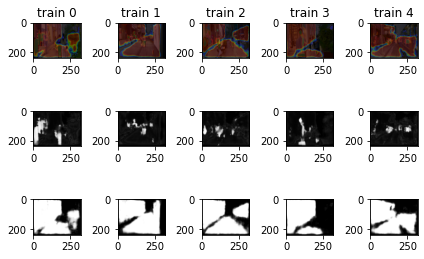

Epoch: 107 	Training Loss: 0.01651


Epoch: 108: 100%|██████████| 20/20 [00:24<00:00,  1.23s/it]


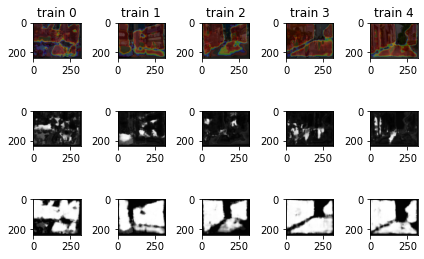

Epoch: 108 	Training Loss: 0.01508


Epoch: 109: 100%|██████████| 20/20 [00:24<00:00,  1.23s/it]


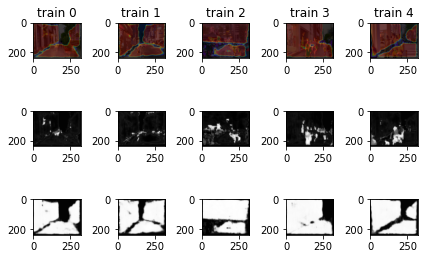

Epoch: 109 	Training Loss: 0.01509


Epoch: 110: 100%|██████████| 20/20 [00:24<00:00,  1.23s/it]


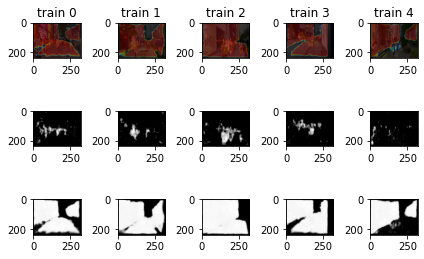

Epoch: 110 	Training Loss: 0.01430


Epoch: 111: 100%|██████████| 20/20 [00:24<00:00,  1.23s/it]


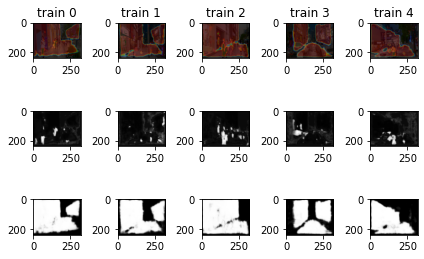

Epoch: 111 	Training Loss: 0.01413


Epoch: 112: 100%|██████████| 20/20 [00:24<00:00,  1.24s/it]


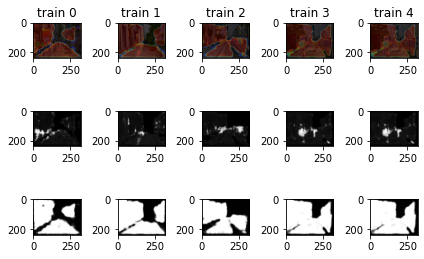

Epoch: 112 	Training Loss: 0.01366


Epoch: 113: 100%|██████████| 20/20 [00:24<00:00,  1.23s/it]


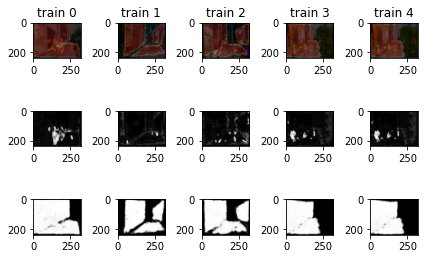

Epoch: 113 	Training Loss: 0.01335


Epoch: 114: 100%|██████████| 20/20 [00:24<00:00,  1.23s/it]


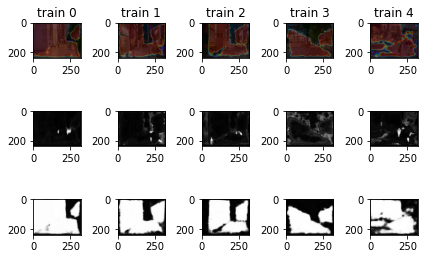

Epoch: 114 	Training Loss: 0.01334


Epoch: 115: 100%|██████████| 20/20 [00:24<00:00,  1.23s/it]


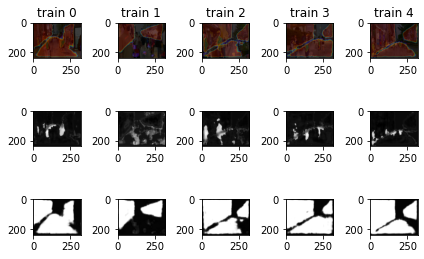

Epoch: 115 	Training Loss: 0.01384


Epoch: 116: 100%|██████████| 20/20 [00:24<00:00,  1.23s/it]


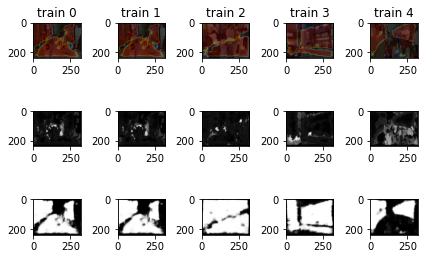

Epoch: 116 	Training Loss: 0.01344


Epoch: 117: 100%|██████████| 20/20 [00:24<00:00,  1.23s/it]


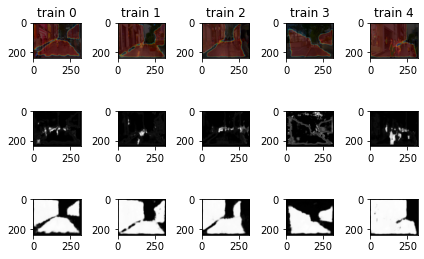

Epoch: 117 	Training Loss: 0.01353


Epoch: 118: 100%|██████████| 20/20 [00:24<00:00,  1.23s/it]


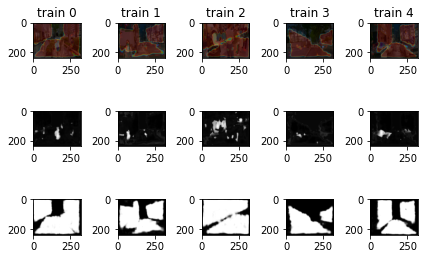

Epoch: 118 	Training Loss: 0.01308


Epoch: 119: 100%|██████████| 20/20 [00:24<00:00,  1.23s/it]


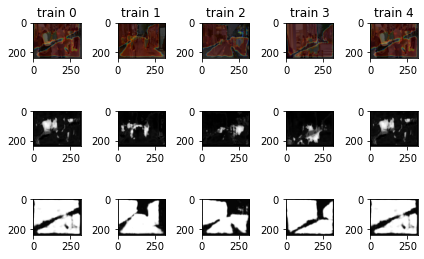

Epoch: 119 	Training Loss: 0.01243


Epoch: 120: 100%|██████████| 20/20 [00:24<00:00,  1.23s/it]


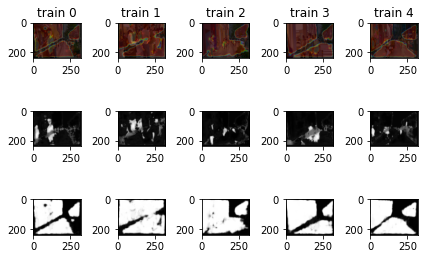

Epoch: 120 	Training Loss: 0.01221


Epoch: 121: 100%|██████████| 20/20 [00:24<00:00,  1.23s/it]


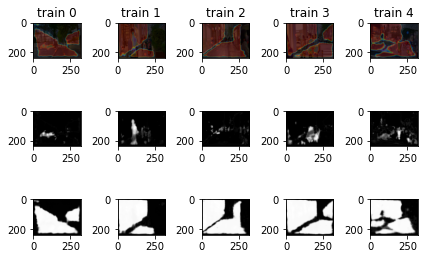

Epoch: 121 	Training Loss: 0.01314


Epoch: 122: 100%|██████████| 20/20 [00:24<00:00,  1.23s/it]


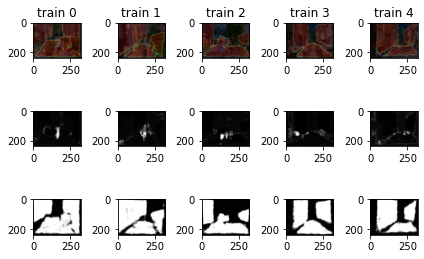

Epoch: 122 	Training Loss: 0.01224


Epoch: 123: 100%|██████████| 20/20 [00:24<00:00,  1.23s/it]


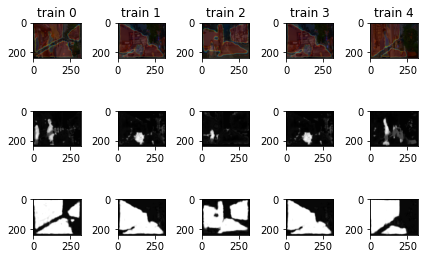

Epoch: 123 	Training Loss: 0.01167


Epoch: 124: 100%|██████████| 20/20 [00:24<00:00,  1.24s/it]


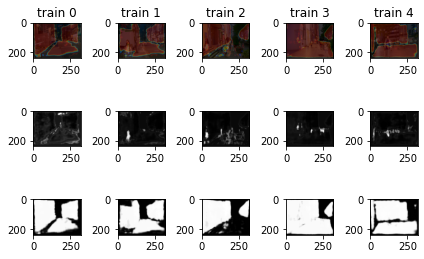

Epoch: 124 	Training Loss: 0.01242


Epoch: 125: 100%|██████████| 20/20 [00:24<00:00,  1.25s/it]


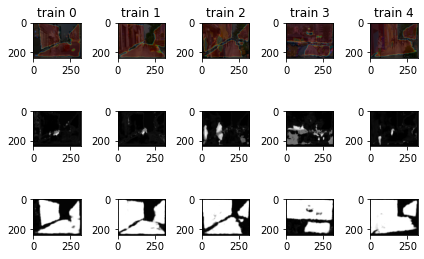

Epoch: 125 	Training Loss: 0.01150


Epoch: 126: 100%|██████████| 20/20 [00:24<00:00,  1.23s/it]


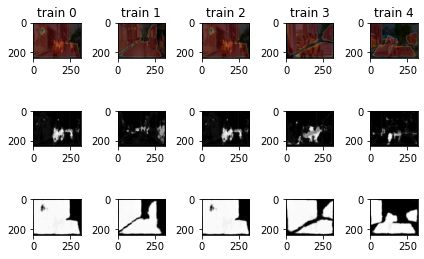

Epoch: 126 	Training Loss: 0.01093


Epoch: 127: 100%|██████████| 20/20 [00:25<00:00,  1.26s/it]


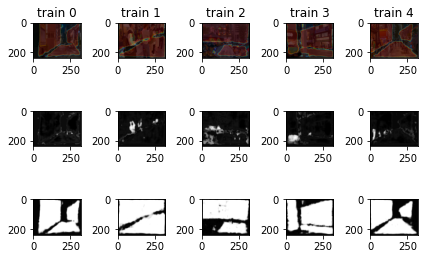

Epoch: 127 	Training Loss: 0.01110


Epoch: 128: 100%|██████████| 20/20 [00:24<00:00,  1.25s/it]


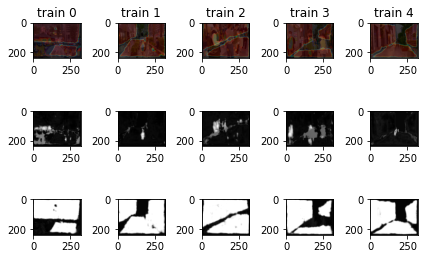

Epoch: 128 	Training Loss: 0.01098


In [4]:
criterion = torch.nn.MSELoss().to(device) 
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)
train_losses = []

for singleEpoch in range(1, EPOCHS+1):
    train_loss = 0.0
    total = 0
    model.train()

    for data, target in tqdm(train_loader, desc="Epoch: {}".format(singleEpoch)):
        data = data.permute(0, 3, 1, 2)
        data = data.cuda().float()
        
        target = target.cuda().float()


        # cleaer the gradients all optimized variables
        optimizer.zero_grad()

        # forward process
        out = model(data)[0]

        loss = criterion(out, target)
        loss.backward()
        
        optimizer.step()
        total += BATCH_SIZE
        train_loss += loss.item()

    # calculate average loss
    train_loss = train_loss/total
    train_losses.append(train_loss)
    # show
    showData(trainDataset, model)

    print('Epoch: {} \tTraining Loss: {:.5f}'.format(singleEpoch, train_loss))

In [5]:

# model = NN.load_model("./weights/model_1.pt", model)
NN.saveModel(model, "./weights/preTrained2.pt")

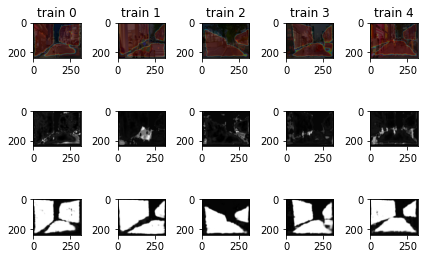

In [6]:
showData(trainDataset, model)